# Assigment 2 

##   breast-cancer-wisconsin

**Autor:** Juan Sebastian Ospina

**02/04/2022** 


## 1) Cargar el data set suministrado breast-cancer-wisconsin.data

In [1]:
%pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns

filename = 'BreastCancerDataSet.csv'
data = pd.read_csv(filename).replace(0,np.nan)

You should consider upgrading via the 'C:\Users\juanb\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\juanb\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## 2) Realice una exploración rápida de los datos cargados indicando el tipo de cada variable, una corta descripción de cada una y presente la dimensión de los datos.


In [2]:
columnas = list(data.loc[:,:])
for i in range(data.shape[1]):
    print(columnas[i],str(type(data.iloc[0,i]))[8:-2])

id numpy.int64
diagnosis str
radius_mean numpy.float64
texture_mean numpy.float64
perimeter_mean numpy.float64
area_mean numpy.float64
smoothness_mean numpy.float64
compactness_mean numpy.float64
concavity_mean numpy.float64
concave points_mean numpy.float64
symmetry_mean numpy.float64
fractal_dimension_mean numpy.float64
radius_se numpy.float64
texture_se numpy.float64
perimeter_se numpy.float64
area_se numpy.float64
smoothness_se numpy.float64
compactness_se numpy.float64
concavity_se numpy.float64
concave points_se numpy.float64
symmetry_se numpy.float64
fractal_dimension_se numpy.float64
radius_worst numpy.float64
texture_worst numpy.float64
perimeter_worst numpy.float64
area_worst numpy.float64
smoothness_worst numpy.float64
compactness_worst numpy.float64
concavity_worst numpy.float64
concave points_worst numpy.float64
symmetry_worst numpy.float64
fractal_dimension_worst numpy.float64
Unnamed: 32 numpy.float64


-  **id**
    ID number

-   **Diagnosis**
    El diagnóstico de tejidos mamarios (M = maligno, B = benigno)

### Para estos se puede apreciar que tienen 3 columanas una con _mean que es la media, _se para le desviacion estandar y _worst para decir cual es el mas peligroso

-   **radius**:
        media de las distancias del centro a los puntos del perímetro

-   **texture**:
    desviación estándar de los valores de la escala de grises

-    **perimeter**:
    perimetro del tumor

-   **area**:
    Area del tumor

-   **smoothness**:
    media de variación local en longitudes de radio

-   **compactness**:
    media del perímetro^2 / área - 1.0

-   **concavity**:
    media de la severidad de las porciones cóncavas del contorno

-   **concave points**:
    media del número de porciones cóncavas del contorno

## 3)  Valide si algunos de los atributos tienen valores faltantes. Indique los atributos con valor faltante y el porcentaje por cada atributo.


In [3]:
print("Datos Faltantes",data.loc[:,:'fractal_dimension_worst'].isnull().sum().sum())
misingvalue = data.columns[data.isna().any()].tolist()[:-1]
for i in misingvalue:
    print(i,"Con un porcentaje de datos faltantes del",str(round((data.loc[:,i].isnull().sum()*100)/data.loc[:,i].count(),3))+"%")



Datos Faltantes 78
concavity_mean Con un porcentaje de datos faltantes del 2.338%
concave points_mean Con un porcentaje de datos faltantes del 2.338%
concavity_se Con un porcentaje de datos faltantes del 2.338%
concave points_se Con un porcentaje de datos faltantes del 2.338%
concavity_worst Con un porcentaje de datos faltantes del 2.338%
concave points_worst Con un porcentaje de datos faltantes del 2.338%


Como se puede ver de lo que se obtiene, faltan un total de 78 datos que se ven en las columnas de concavity y concave points, estos en sus tres tipos diferentes mean,se y worst, ademas de que los porcentajes muestran es la misma cantidad por cada una de estas columnas por lo que estarian faltando por cada fila los 6 valores.

## 4)  Muestre la cantidad de pacientes por cada tipo de tumor (benign o malignant) junto con una representación gráfica

diagnosis
Bening       357
Malignant    212
dtype: int64


<AxesSubplot:xlabel='diagnosis'>

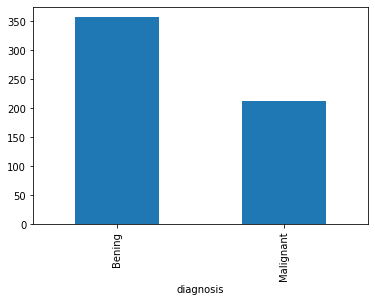

In [4]:
punto4 = data.groupby('diagnosis').size().rename({'B':'Bening','M':'Malignant'})
print(punto4)
punto4.plot(kind='bar')

## 5) Identifique relaciones/patrones encuentra entre los atributos y la posibilidad de tener cáncer, y visceer la posibilidad de no tenerlo.

In [5]:
data.groupby("diagnosis").mean().iloc[:,1:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.047798,0.026689,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.172520,0.077258,0.270246,0.079442,NaN
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


De lo que se puede apreciar con la media de los datos agrupados por benignos y malignos se puede apreciar que la media de los malignos es mayor que la media de los malignos lo que deja entre ver que los tumores mas grandes tiene mas probabilidades de ser cancerigenos.

## 6)  Cuáles son los atributos más relevantes con la enfermedad del cáncer de mama.

Pues de lo que yo creo los atributos que tienen una mayor diferencia en las medias y ya al hacer una grafica de dispercion en las que se vean menor dispercion, y pues de los datos que se pueden obtener con la consulta anterior creo que factores importantes pueden ser los de tamaño,como lo puede ser radio,area y perimetro estas se ve una gran diferencia entre las medias por lo que me deja entrever que son atributos importantes a la hora de detectar el cancer.

## 7) Realice gráfico de dispersión entre cada par de atributos con la intención de conocer la relación entre ellas y la posibilidad de tener cáncer o no.

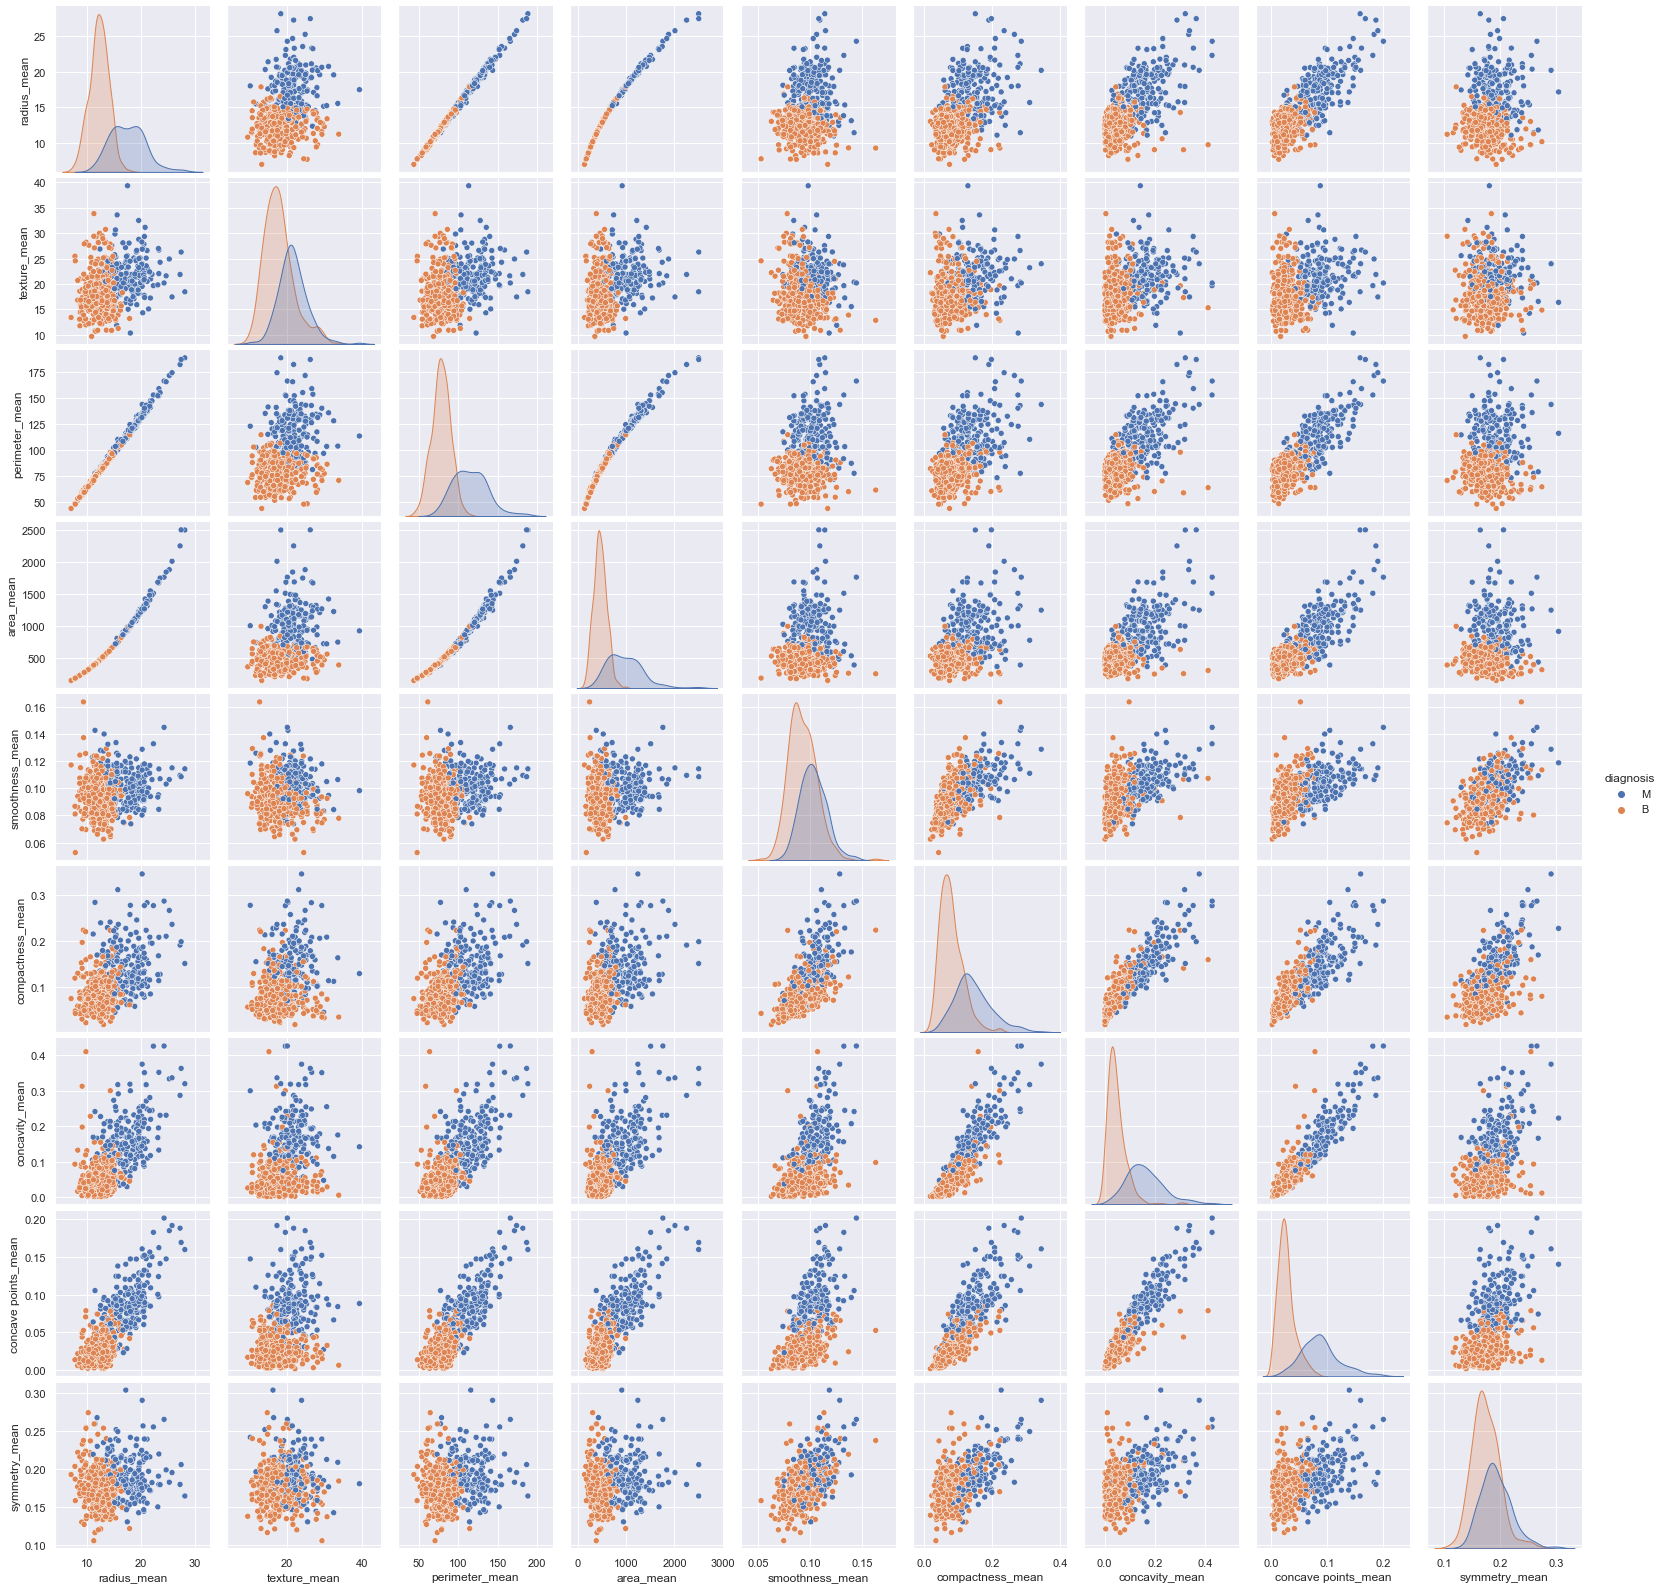

In [6]:
sns.set()
analisis = data.rename({'B':'Bening','M':'Malignant'})
cols_to_pairplot = analisis.columns[1:11]
sns.pairplot(analisis[cols_to_pairplot], hue="diagnosis")


Busque en google una libreria que sirviera para el creacion de graficas de dispercion y encontre seaborn, al ver las graficas de dispercion se puede ver que existe una tendencia y/o relacion de tumores malignos y venignos con los datos, pero donde se ve una menor dispercion es en graficas de.

- 
    1 radio medio vs perimetro medio y viceversa
    2 radio medio vs area media y viceversa
    3 area media vs perimetro medio y viceversa

ya que en estas se ve una dispercion baja y se nota mucho una tendencia como se supuso en el punto anterios, cabe aclarar que en la mayoria de las graficas se puede ver una dispercion mayor en otras graficas pero aun haci se ve que el azul que es el maligno suele ser mayor en la mayoria de los casos.

## 8) Importante en cada gráfico hacer una interpretación sobre lo visualizado, además de la figura, es importante su respectiva interpretación a cada uno, es decir, qué revela el gráfico?  La interpretación es una redacción suya argumentada y coherente sobre los hallazgos observados en el gráfico

Para hacer el interpretacion de las graficas pues como se realizo una graficacion de todas las combinaciones es decir que van a estar "repetidas la mitas" por que van a ser la transpuesta de la base entonces tomaremos la mitad de la grafica dividad por la diagonal para analizar, se graficaron solo las medias por que eran las que dieron resultados mas perseptibles, y se veian los mismos patrones en cada una de la otras SE y Worst

- Radius vs Radius: como podemos ver en la dispercion de el radio el radio suele ser mayor en los tumores malignos, y los benignos tiene una grafica muy agrupada ayudando a en la mayoria de los casos permitir conocer si son benignos por su radio pero no se puede asegurar.

- Radius vs Textura: se puede apreciar que gracias al ratio se puede ver una separacion de los puntos de los malignos y benignos pero la textura no es algo que permita definir bien si es alguno de los dos de forma clara.

- Radio vs Perimetro: en esta se puede apreciar una tendencia a ser una grafica lineal, lo que permite entender que entre mas grande el radio el perimetro aumenta como lo dice la geometria, por lo que si el perimetro es grande tambien va a ser un valor que permite ver si es maligno el tumor

- Radio vs Area: Al igual que el perimetro el area va a depender del radio por lo que si el radio es grande el area tambien, y un tumor de una gran area es muy probable que sea maligno la tendencia muestra eso

- Radio vs Suavidad: La suavidad del tumo no suele ser algo que permita definir si es maligno el tumo se ve que no es tan comun que sean blandos, pero la grafica esta muy agrupada en el eje de la suavidad, porlo que el radio es quien separa los colores como vimos en la de textura.

- Radio vs Compacto: en este caso pasa algo especia por uqe pues esta muy agrupada la grafica con lo compacto que sea el tumor pero se puede ver que si es mas compacto de lo normal ess mas posible que sea uno maligno, ya que en 2.5 o mas la probabilidad que sea maligno es mayor.

- Radio vs Concavidad: Se logra apreciar que la concavidad si es algo que afecta lo tumores benignos sulen ser poco concavos y los malignos son mucho mas concavos de lo normal, aunque existe una zona donde se aprecian los dos muy juntos pero el radio ayuda a separarlos.

- Radio vs Puntos Concavos: De manera clara se puede definir que entre mas puntos concavos la probabilidad de que sea un tumor maligno es mayor, lo tumores benignos estan muy cerca a cero mientras que los malignos si llegan a mucho mas

- Radio vs Simetria: la simetria no es algo que permita definir si es un tumor maligno o benigno.

Para el resto de graficas se puede peribir que se siguen los patrones, si se compara con alguno de los atributos antes mencionados como relevantes o que si se puede percibir una diferencia, pues la grafica se puede ver separada, pero si son atributos como lo es textura y simetria no se  aprecia una diferencia clara ni se puede asegurar o predecir algo claro de esa grafica.
